# Infnet
## Projeto de Bloco - Aula de Pré-Processamento

Prof: Jean Machado

In [0]:
# Importação de Bibliotecas
import pyspark
from pyspark.sql import SparkSession

In [0]:
# Inicia sessão Spark
spark = SparkSession.builder.master("local[*]") \
                    .appName('AulaSparkPreProcessamento') \
                    .getOrCreate()

## Exploratory Data Analysis - EDA

In [0]:
# https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python
#/FileStore/tables/titanic-1.csv
#Load the data
pysparkDF = spark.read.csv("/FileStore/tables/titanic-1.csv", header=True, inferSchema=True, sep=",")

#Load the local data with pandas
# df = pd.read_csv('/FileStore/tables/titanic-1.csv') # Erro, pois o pandas só lê arquivos locais

In [0]:
pysparkDF.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+-------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch| Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+-------+-------+-----+--------+
|        892|       0|     3|    Kelly, Mr. James|  male|34.5|    0|    0| 330911| 7.8292| null|       Q|
|        893|       1|     3|Wilkes, Mrs. Jame...|female|47.0|    1|    0| 363272|    7.0| null|       S|
|        894|       0|     2|Myles, Mr. Thomas...|  male|62.0|    0|    0| 240276| 9.6875| null|       Q|
|        895|       0|     3|    Wirz, Mr. Albert|  male|27.0|    0|    0| 315154| 8.6625| null|       S|
|        896|       1|     3|Hirvonen, Mrs. Al...|female|22.0|    1|    1|3101298|12.2875| null|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+-------+-------+-----+--------+
only showing top 5 rows



In [0]:
# Importa bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
# Outra forma de importar base titanic
titanic = sns.load_dataset('titanic')

In [0]:
titanic.head()

survived 
 pclass 
 sex 
 age 
 sibsp 
 parch 
 fare 
 embarked 
 class 
 who 
 adult_male 
 deck 
 embark_town 
 alive 
 alone 
 
 
 
 
 0 
 0 
 3 
 male 
 22.0 
 1 
 0 
 7.2500 
 S 
 Third 
 man 
 True 
 NaN 
 Southampton 
 no 
 False 
 
 
 1 
 1 
 1 
 female 
 38.0 
 1 
 0 
 71.2833 
 C 
 First 
 woman 
 False 
 C 
 Cherbourg 
 yes 
 False 
 
 
 2 
 1 
 3 
 female 
 26.0 
 0 
 0 
 7.9250 
 S 
 Third 
 woman 
 False 
 NaN 
 Southampton 
 yes 
 True 
 
 
 3 
 1 
 1 
 female 
 35.0 
 1 
 0 
 53.1000 
 S 
 First 
 woman 
 False 
 C 
 Southampton 
 yes 
 False 
 
 
 4 
 0 
 3 
 male 
 35.0 
 0 
 0 
 8.0500 
 S 
 Third 
 man 
 True 
 NaN 
 Southampton 
 no 
 True

Out[120]: <AxesSubplot:xlabel='sex', ylabel='count'>

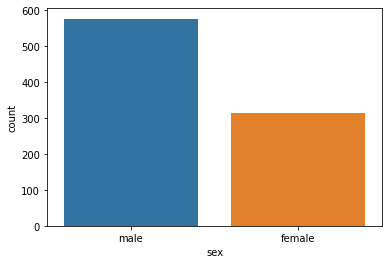

In [0]:
sns.countplot(data = titanic,x = 'sex')

In [0]:
# https://sparkbyexamples.com/pandas/convert-pyspark-dataframe-to-pandas/
df = pysparkDF.toPandas()
print(df)

     PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
0            892         0       3  ...    7.8292  None         Q
1            893         1       3  ...    7.0000  None         S
2            894         0       2  ...    9.6875  None         Q
3            895         0       3  ...    8.6625  None         S
4            896         1       3  ...   12.2875  None         S
..           ...       ...     ...  ...       ...   ...       ...
413         1305         0       3  ...    8.0500  None         S
414         1306         1       1  ...  108.9000  C105         C
415         1307         0       3  ...    7.2500  None         S
416         1308         0       3  ...    8.0500  None         S
417         1309         0       3  ...   22.3583  None         C

[418 rows x 12 columns]


In [0]:
df.head() # pandas dataframe

PassengerId 
 Survived 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 0 
 892 
 0 
 3 
 Kelly, Mr. James 
 male 
 34.5 
 0 
 0 
 330911 
 7.8292 
 None 
 Q 
 
 
 1 
 893 
 1 
 3 
 Wilkes, Mrs. James (Ellen Needs) 
 female 
 47.0 
 1 
 0 
 363272 
 7.0000 
 None 
 S 
 
 
 2 
 894 
 0 
 2 
 Myles, Mr. Thomas Francis 
 male 
 62.0 
 0 
 0 
 240276 
 9.6875 
 None 
 Q 
 
 
 3 
 895 
 0 
 3 
 Wirz, Mr. Albert 
 male 
 27.0 
 0 
 0 
 315154 
 8.6625 
 None 
 S 
 
 
 4 
 896 
 1 
 3 
 Hirvonen, Mrs. Alexander (Helga E Lindqvist) 
 female 
 22.0 
 1 
 1 
 3101298 
 12.2875 
 None 
 S

In [0]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int32  
 1   Survived     418 non-null    int32  
 2   Pclass       418 non-null    int32  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int32  
 7   Parch        418 non-null    int32  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int32(5), object(5)
memory usage: 31.1+ KB


In [0]:
#Describe the data
df.describe()

PassengerId 
 Survived 
 Pclass 
 SibSp 
 Parch 
 
 
 
 
 count 
 418.000000 
 418.000000 
 418.000000 
 418.000000 
 418.000000 
 
 
 mean 
 1100.500000 
 0.363636 
 2.265550 
 0.447368 
 0.392344 
 
 
 std 
 120.810458 
 0.481622 
 0.841838 
 0.896760 
 0.981429 
 
 
 min 
 892.000000 
 0.000000 
 1.000000 
 0.000000 
 0.000000 
 
 
 25% 
 996.250000 
 0.000000 
 1.000000 
 0.000000 
 0.000000 
 
 
 50% 
 1100.500000 
 0.000000 
 3.000000 
 0.000000 
 0.000000 
 
 
 75% 
 1204.750000 
 1.000000 
 3.000000 
 1.000000 
 0.000000 
 
 
 max 
 1309.000000 
 1.000000 
 3.000000 
 8.000000 
 9.000000

In [0]:
#Find the duplicates values
df.duplicated().sum()

Out[125]: 0

In [0]:
#unique values
print("Classes:",df['Pclass'].unique())

print("Sobreviveu:",df['Survived'].unique())

print("Gênero:",df['Sex'].unique())

Classes: [3 2 1]
Sobreviveu: [0 1]
Gênero: ['male' 'female']


Out[127]: <AxesSubplot:xlabel='Pclass', ylabel='count'>

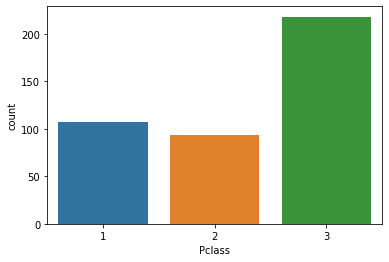

In [0]:
#Plot the values class
sns.countplot(x='Pclass', data=df)

In [0]:
#Find null values
df.isnull().sum()

Out[128]: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
#Replace null values with zero
df.replace(np.nan,'0',inplace = True)

#Check the changes now
df.isnull().sum()

Out[177]: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [0]:
#Datatypes
df.dtypes

Out[130]: PassengerId     int32
Survived        int32
Pclass          int32
Name           object
Sex            object
Age            object
SibSp           int32
Parch           int32
Ticket         object
Fare           object
Cabin          object
Embarked       object
dtype: object

In [0]:
#Filter data the class
df[df['Pclass']==1].head()

PassengerId 
 Survived 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 11 
 903 
 0 
 1 
 Jones, Mr. Charles Cresson 
 male 
 46.0 
 0 
 0 
 694 
 26.0 
 0 
 S 
 
 
 12 
 904 
 1 
 1 
 Snyder, Mrs. John Pillsbury (Nelle Stevenson) 
 female 
 23.0 
 1 
 0 
 21228 
 82.2667 
 B45 
 S 
 
 
 14 
 906 
 1 
 1 
 Chaffee, Mrs. Herbert Fuller (Carrie Constance... 
 female 
 47.0 
 1 
 0 
 W.E.P. 5734 
 61.175 
 E31 
 S 
 
 
 20 
 912 
 0 
 1 
 Rothschild, Mr. Martin 
 male 
 55.0 
 1 
 0 
 PC 17603 
 59.4 
 0 
 C 
 
 
 22 
 914 
 1 
 1 
 Flegenheim, Mrs. Alfred (Antoinette) 
 female 
 0 
 0 
 0 
 PC 17598 
 31.6833 
 0 
 S

Out[132]: <AxesSubplot:>

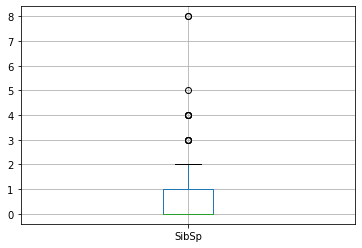

In [0]:
#Boxplot
df[['SibSp']].boxplot()

In [0]:
#Correlation 
df.corr()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-456140957547729>:2
      1 #Correlation 
----> 2 df.corr()

NameError: name 'df' is not defined

Out[134]: <AxesSubplot:>

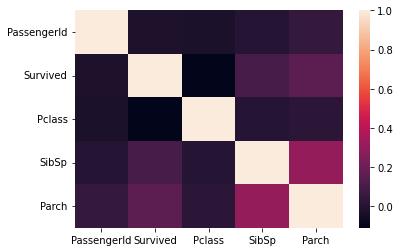

In [0]:
# https://linuxhint.com/seaborn-heatmap-colors/
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps
# https://seaborn.pydata.org/tutorial/introduction.html
# Correlation plot
sns.heatmap(df.corr())

Out[135]: <AxesSubplot:>

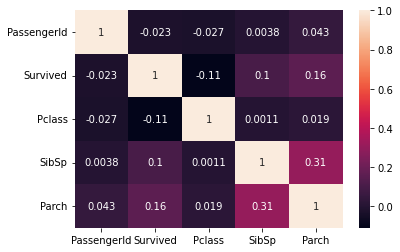

In [0]:
# annot - inclui os valores
sns.heatmap(df.corr(),annot=True)

Out[240]: <AxesSubplot:>

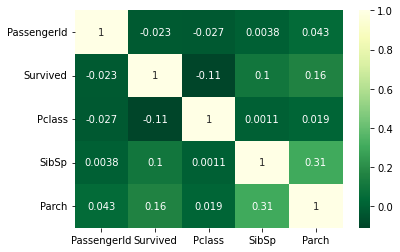

In [0]:
# cmap - troca paleta
sns.heatmap(df.corr(),annot=True,cmap="YlGn_r") # camp="coolwarm",plasma,YlGn_r

In [0]:
# cmap - troca paleta
sns.heatmap(df.corr(),annot=True,cmap="Blues",cbar=False) 

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-456140957547733>:2
      1 # cmap - troca paleta
----> 2 sns.heatmap(df.corr(),annot=True,cmap="Blues",cbar=False)

NameError: name 'sns' is not defined

# Data Profiling Report

In [0]:
#https://pypi.org/project/pandas-profiling/
!pip install pandas-profiling

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-e92c839c-071f-4cef-8a03-41bb626be243/bin/python -m pip install --upgrade pip' command.


In [0]:
!pip install MarkupSafe==2.0.1

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-e92c839c-071f-4cef-8a03-41bb626be243/bin/python -m pip install --upgrade pip' command.


In [0]:
import pandas as pd
from pandas_profiling import ProfileReport

In [0]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<iframe width="100%" height="800px" srcdoc="<!doctype html><html lang=en><head><meta charset=utf-8><meta name=viewport content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name=description content="Profile report generated by YData! Visit us at https://ydata.ai"><meta name=author content="YData and the open source community."><meta name=generator content="Pandas Profiling vv3.6.2"><meta name=url content=https://github.com/ydataai/pandas-profiling><meta name=date content="2023-03-13 23:12:45.469356"><title>Pandas Profiling Report</title><style>
/*!
 * Bootstrap v3.3.7 (http://getbootstrap.com)
 * Copyright 2011-2016 Twitter, Inc.
 * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)
 *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,hgroup,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{display:inline-block;vertical-align:baseline}audio:not([controls]){display:none;height:0}[hidden],template{display:none}a{background-color:transparent}a:active,a:hover{outline:0}abbr[title]{border-bottom:1px dotted}b,strong{font-weight:700}dfn{font-style:italic}h1{margin:.67em 0;font-size:2em}mark{color:#000;background:#ff0}small{font-size:80%}sub,sup{position:relative;font-size:75%;line-height:0;vertical-align:baseline}sup{top:-.5em}sub{bottom:-.25em}img{border:0}svg:not(:root){overflow:hidden}figure{margin:1em 40px}hr{height:0;-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box}pre{overflow:auto}code,kbd,pre,samp{font-family:monospace,monospace;font-size:1em}button,input,optgroup,select,textarea{margin:0;font:inherit;color:inherit}button{overflow:visible}button,select{text-transform:none}button,html input[type=button],input[type=reset],input[type=submit]{-webkit-appearance:button;cursor:pointer}button[disabled],html input[disabled]{cursor:default}button::-moz-focus-inner,input::-moz-focus-inner{padding:0;border:0}input{line-height:normal}input[type=checkbox],input[type=radio]{-webkit-box-sizing:border-box;-moz-box-sizing:border-box;box-sizing:border-box;padding:0}input[type=number]::-webkit-inner-spin-button,input[type=number]::-webkit-outer-spin-button{height:auto}input[type=search]{-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box;-webkit-appearance:textfield}input[type=search]::-webkit-search-cancel-button,input[type=search]::-webkit-search-decoration{-webkit-appearance:none}fieldset{padding:.35em .625em .75em;margin:0 2px;border:1px solid silver}legend{padding:0;border:0}textarea{overflow:auto}optgroup{font-weight:700}table{border-spacing:0;border-collapse:collapse}td,th{padding:0}/*! Source: https://github.com/h5bp/html5-boilerplate/blob/master/src/css/main.css */@media print{*,:after,:before{color:#000!important;text-shadow:none!important;background:0 0!important;-webkit-box-shadow:none!important;box-shadow:none!important}a,a:visited{text-decoration:underline}a[href]:after{content:" (" attr(href) ")"}abbr[title]:after{content:" (" attr(title) ")"}a[href^="javascript:"]:after,a[href^="#"]:after{content:""}blockquote,pre{border:1px solid #999;page-break-inside:avoid}thead{display:table-header-group}img,tr{page-break-inside:avoid}img{max-width:100%!important}h2,h3,p{orphans:3;widows:3}h2,h3{page-break-after:avoid}.navbar{display:none}.btn>.caret,.dropup>.btn>.caret{border-top-color:#000!important}.label{border:1px solid #000}.table{border-collapse:collapse!important}.table td,.table th{background-color:#fff!important}.table-bordered td,.table-bordered th{border:1px solid #ddd!important}}@font-face{font-family:'Glyphicons Halflings';src:url(../fonts/glyphicons-halflings-regular.eot);src:url(../fonts/glyphicons-halflings-regular.eot?#iefix) format('embedded-opentype'),url(../fonts/glyphicons-halflings-regular.woff2) format('woff2'),url(../fo

Out[12]: 

In [0]:
# Exportar relatório para arquivo HTML local
ProfileReport(df).to_file("titanicProfilerReport.html") 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Pré-Processamento

In [0]:
#Leitura de arquivos CSV
carros = spark.read.csv("/FileStore/tables/Carros.csv", header=True, inferSchema=True, sep=";")
carros.show(5)

+-------+---------+-----------+---------------+----+-----+---------+-----------+-------+-----------+---+
|Consumo|Cilindros|Cilindradas|RelEixoTraseiro|Peso|Tempo|TipoMotor|Transmissao|Marchas|Carburadors| HP|
+-------+---------+-----------+---------------+----+-----+---------+-----------+-------+-----------+---+
|     21|        6|        160|             39| 262| 1646|        0|          1|      4|          4|110|
|     21|        6|        160|             39|2875| 1702|        0|          1|      4|          4|110|
|    228|        4|        108|            385| 232| 1861|        1|          1|      4|          1| 93|
|    214|        6|        258|            308|3215| 1944|        1|          0|      3|          1|110|
|    187|        8|        360|            315| 344| 1702|        0|          0|      3|          2|175|
+-------+---------+-----------+---------------+----+-----+---------+-----------+-------+-----------+---+
only showing top 5 rows



In [0]:
type(carros)

Out[139]: pyspark.sql.dataframe.DataFrame

In [0]:
#https://sparkbyexamples.com/pyspark/pyspark-groupby-explained-with-example/
# distinct count
print("Distinct Count: " + str(carros.distinct().count()))

Distinct Count: 32


In [0]:
from pyspark.sql.functions import countDistinct
carrosdist=carros.select(countDistinct("Cilindros", "Consumo"))
carrosdist.show()

+----------------------------------+
|count(DISTINCT Cilindros, Consumo)|
+----------------------------------+
|                                27|
+----------------------------------+



In [0]:
# functions.count()
from pyspark.sql.functions import count
carros.select(count(carros.Consumo)).show()
carros.select(count(carros.Consumo), count(carros.Cilindros)).show()

+--------------+
|count(Consumo)|
+--------------+
|            32|
+--------------+

+--------------+----------------+
|count(Consumo)|count(Cilindros)|
+--------------+----------------+
|            32|              32|
+--------------+----------------+



In [0]:
# funções de agregação usando agg
carros.agg({'Cilindros':'count','Consumo':'avg','Cilindradas':'sum'}).show()

+----------------+----------------+------------+
|count(Cilindros)|sum(Cilindradas)|avg(Consumo)|
+----------------+----------------+------------+
|              32|           25483|    177.5625|
+----------------+----------------+------------+



In [0]:
# Função de agregação com group by
carros.groupBy("Carburadors","TipoMotor").avg("Cilindros","Cilindradas").show(truncate=False)

+-----------+---------+-----------------+-----------------+
|Carburadors|TipoMotor|avg(Cilindros)   |avg(Cilindradas) |
+-----------+---------+-----------------+-----------------+
|6          |0        |6.0              |145.0            |
|4          |0        |7.5              |344.125          |
|1          |1        |4.571428571428571|481.2857142857143|
|2          |1        |4.0              |940.8            |
|2          |0        |7.2              |517.0            |
|8          |0        |8.0              |301.0            |
|3          |0        |8.0              |2758.0           |
|4          |1        |6.0              |1676.0           |
+-----------+---------+-----------------+-----------------+



# PySpark SQL

In [0]:
# Cria visão temporária
carros.createOrReplaceTempView("tbcarro")

In [0]:
# Consulta Spark SQL para listar contagem
spark.sql("SELECT COUNT(*) FROM tbcarro").show()

+--------+
|count(1)|
+--------+
|      32|
+--------+



In [0]:
# Lista apenas colunas específicas
spark.sql("SELECT Consumo, Cilindros FROM tbcarro").show()

+-------+---------+
|Consumo|Cilindros|
+-------+---------+
|     21|        6|
|     21|        6|
|    228|        4|
|    214|        6|
|    187|        8|
|    181|        6|
|    143|        8|
|    244|        4|
|    228|        4|
|    192|        6|
|    178|        6|
|    164|        8|
|    173|        8|
|    152|        8|
|    104|        8|
|    104|        8|
|    147|        8|
|    324|        4|
|    304|        4|
|    339|        4|
+-------+---------+
only showing top 20 rows



In [0]:
%sql
DROP TABLE IF EXISTS diamonds;

CREATE TABLE diamonds
USING csv
OPTIONS (path "/databricks-datasets/Rdatasets/data-001/csv/ggplot2/diamonds.csv", header "true")

In [0]:
%sql
SELECT * from diamonds

_c0 carat cut color clarity depth table price x y z 1 0.23 Ideal E SI2 61.5 55 326 3.95 3.98 2.43 2 0.21 Premium E SI1 59.8 61 326 3.89 3.84 2.31 3 0.23 Good E VS1 56.9 65 327 4.05 4.07 2.31 4 0.29 Premium I VS2 62.4 58 334 4.2 4.23 2.63 5 0.31 Good J SI2 63.3 58 335 4.34 4.35 2.75 6 0.24 Very Good J VVS2 62.8 57 336 3.94 3.96 2.48 7 0.24 Very Good I VVS1 62.3 57 336 3.95 3.98 2.47 8 0.26 Very Good H SI1 61.9 55 337 4.07 4.11 2.53 9 0.22 Fair E VS2 65.1 61 337 3.87 3.78 2.49 10 0.23 Very Good H VS1 59.4 61 338 4 4.05 2.39 11 0.3 Good J SI1 64 55 339 4.25 4.28 2.73 12 0.23 Ideal J VS1 62.8 56 340 3.93 3.9 2.46 13 0.22 Premium F SI1 60.4 61 342 3.88 3.84 2.33 14 0.31 Ideal J SI2 62.2 54 344 4.35 4.37 2.71 15 0.2 Premium E SI2 60.2 62 345 3.79 3.75 2.27 16 0.32 Premium E I1 60.9 58 345 4.38 4.42 2.68 17 0.3 Ideal I SI2 62 54 348 4.31 4.34 2.68 18 0.3 Good J SI1 63.4 54 351 4.23 4.29 2.7 19 0.3 Good J SI1 63.8 56 351 4.23 4.26 2.71 20 0.3 Very Good J SI1 62.7 59 351 4.21 4.27 2.66 21 0.3 Good I SI2 63.3 56 351 4.26 4.3 2.71 22 0.23 Very Good E VS2 63.8 55 352 3.85 3.92 2.48 23 0.23 Very Good H VS1 61 57 353 3.94 3.96 2.41 24 0.31 Very Good J SI1 59.4 62 353 4.39 4.43 2.62 25 0.31 Very Good J SI1 58.1 62 353 4.44 4.47 2.59 26 0.23 Very Good G VVS2 60.4 58 354 3.97 4.01 2.41 27 0.24 Premium I VS1 62.5 57 355 3.97 3.94 2.47 28 0.3 Very Good J VS2 62.2 57 357 4.28 4.3 2.67 29 0.23 Very Good D VS2 60.5 61 357 3.96 3.97 2.4 30 0.23 Very Good F VS1 60.9 57 357 3.96 3.99 2.42 31 0.23 Very Good F VS1 60 57 402 4 4.03 2.41 32 0.23 Very Good F VS1 59.8 57 402 4.04 4.06 2.42 33 0.23 Very Good E VS1 60.7 59 402 3.97 4.01 2.42 34 0.23 Very Good E VS1 59.5 58 402 4.01 4.06 2.4 35 0.23 Very Good D VS1 61.9 58 402 3.92 3.96 2.44 36 0.23 Good F VS1 58.2 59 402 4.06 4.08 2.37 37 0.23 Good E VS1 64.1 59 402 3.83 3.85 2.46 38 0.31 Good H SI1 64 54 402 4.29 4.31 2.75 39 0.26 Very Good D VS2 60.8 59 403 4.13 4.16 2.52 40 0.33 Ideal I SI2 61.8 55 403 4.49 4.51 2.78 41 0.33 Ideal I SI2 61.2 56 403 4.49 4.5 2.75 42 0.33 Ideal J SI1 61.1 56 403 4.49 4.55 2.76 43 0.26 Good D VS2 65.2 56 403 3.99 4.02 2.61 44 0.26 Good D VS1 58.4 63 403 4.19 4.24 2.46 45 0.32 Good H SI2 63.1 56 403 4.34 4.37 2.75 46 0.29 Premium F SI1 62.4 58 403 4.24 4.26 2.65 47 0.32 Very Good H SI2 61.8 55 403 4.35 4.42 2.71 48 0.32 Good H SI2 63.8 56 403 4.36 4.38 2.79 49 0.25 Very Good E VS2 63.3 60 404 4 4.03 2.54 50 0.29 Very Good H SI2 60.7 60 404 4.33 4.37 2.64 51 0.24 Very Good F SI1 60.9 61 404 4.02 4.03 2.45 52 0.23 Ideal G VS1 61.9 54 404 3.93 3.95 2.44 53 0.32 Ideal I SI1 60.9 55 404 4.45 4.48 2.72 54 0.22 Premium E VS2 61.6 58 404 3.93 3.89 2.41 55 0.22 Premium D VS2 59.3 62 404 3.91 3.88 2.31 56 0.3 Ideal I SI2 61 59 405 4.3 4.33 2.63 57 0.3 Premium J SI2 59.3 61 405 4.43 4.38 2.61 58 0.3 Very Good I SI1 62.6 57 405 4.25 4.28 2.67 59 0.3 Very Good I SI1 63 57 405 4.28 4.32 2.71 60 0.3 Good I SI1 63.2 55 405 4.25 4.29 2.7 61 0.35 Ideal I VS1 60.9 57 552 4.54 4.59 2.78 62 0.3 Premium D SI1 62.6 59 552 4.23 4.27 2.66 63 0.3 Ideal D SI1 62.5 57 552 4.29 4.32 2.69 64 0.3 Ideal D SI1 62.1 56 552 4.3 4.33 2.68 65 0.42 Premium I SI2 61.5 59 552 4.78 4.84 2.96 66 0.28 Ideal G VVS2 61.4 56 553 4.19 4.22 2.58 67 0.32 Ideal I VVS1 62 55.3 553 4.39 4.42 2.73 68 0.31 Very Good G SI1 63.3 57 553 4.33 4.3 2.73 69 0.31 Premium G SI1 61.8 58 553 4.35 4.32 2.68 70 0.24 Premium E VVS1 60.7 58 553 4.01 4.03 2.44 71 0.24 Very Good D VVS1 61.5 60 553 3.97 4 2.45 72 0.3 Very Good H SI1 63.1 56 554 4.29 4.27 2.7 73 0.3 Premium H SI1 62.9 59 554 4.28 4.24 2.68 74 0.3 Premium H SI1 62.5 57 554 4.29 4.25 2.67 75 0.3 Good H SI1 63.7 57 554 4.28 4.26 2.72 76 0.26 Very Good F VVS2 59.2 60 554 4.19 4.22 2.49 77 0.26 Very Good E VVS2 59.9 58 554 4.15 4.23 2.51 78 0.26 Very Good D VVS2 62.4 54 554 4.08 4.13 2.56 79 0.26 Very Good D VVS2 62.8 60 554 4.01 4.05 2.53 80 0.26 Very Good E VVS1 62.6 59 554 4.06 4.09 2.55 81 0.26 Very Good E VVS1 63.4 59 554 4 4.04 2.55 82 0.26 Very Good D VVS1 62.1 60 554 4.03 4.12 2

In [0]:
%python
diamonds = spark.read.csv("/databricks-datasets/Rdatasets/data-001/csv/ggplot2/diamonds.csv", header="true", inferSchema="true")
diamonds.write.format("delta").mode("overwrite").save("/delta/diamonds")

In [0]:
%sql
DROP TABLE IF EXISTS diamonds;

CREATE TABLE diamonds USING DELTA LOCATION '/delta/diamonds/'

In [0]:
%sql
SELECT * from diamonds

_c0 carat cut color clarity depth table price x y z 1 0.23 Ideal E SI2 61.5 55.0 326 3.95 3.98 2.43 2 0.21 Premium E SI1 59.8 61.0 326 3.89 3.84 2.31 3 0.23 Good E VS1 56.9 65.0 327 4.05 4.07 2.31 4 0.29 Premium I VS2 62.4 58.0 334 4.2 4.23 2.63 5 0.31 Good J SI2 63.3 58.0 335 4.34 4.35 2.75 6 0.24 Very Good J VVS2 62.8 57.0 336 3.94 3.96 2.48 7 0.24 Very Good I VVS1 62.3 57.0 336 3.95 3.98 2.47 8 0.26 Very Good H SI1 61.9 55.0 337 4.07 4.11 2.53 9 0.22 Fair E VS2 65.1 61.0 337 3.87 3.78 2.49 10 0.23 Very Good H VS1 59.4 61.0 338 4.0 4.05 2.39 11 0.3 Good J SI1 64.0 55.0 339 4.25 4.28 2.73 12 0.23 Ideal J VS1 62.8 56.0 340 3.93 3.9 2.46 13 0.22 Premium F SI1 60.4 61.0 342 3.88 3.84 2.33 14 0.31 Ideal J SI2 62.2 54.0 344 4.35 4.37 2.71 15 0.2 Premium E SI2 60.2 62.0 345 3.79 3.75 2.27 16 0.32 Premium E I1 60.9 58.0 345 4.38 4.42 2.68 17 0.3 Ideal I SI2 62.0 54.0 348 4.31 4.34 2.68 18 0.3 Good J SI1 63.4 54.0 351 4.23 4.29 2.7 19 0.3 Good J SI1 63.8 56.0 351 4.23 4.26 2.71 20 0.3 Very Good J SI1 62.7 59.0 351 4.21 4.27 2.66 21 0.3 Good I SI2 63.3 56.0 351 4.26 4.3 2.71 22 0.23 Very Good E VS2 63.8 55.0 352 3.85 3.92 2.48 23 0.23 Very Good H VS1 61.0 57.0 353 3.94 3.96 2.41 24 0.31 Very Good J SI1 59.4 62.0 353 4.39 4.43 2.62 25 0.31 Very Good J SI1 58.1 62.0 353 4.44 4.47 2.59 26 0.23 Very Good G VVS2 60.4 58.0 354 3.97 4.01 2.41 27 0.24 Premium I VS1 62.5 57.0 355 3.97 3.94 2.47 28 0.3 Very Good J VS2 62.2 57.0 357 4.28 4.3 2.67 29 0.23 Very Good D VS2 60.5 61.0 357 3.96 3.97 2.4 30 0.23 Very Good F VS1 60.9 57.0 357 3.96 3.99 2.42 31 0.23 Very Good F VS1 60.0 57.0 402 4.0 4.03 2.41 32 0.23 Very Good F VS1 59.8 57.0 402 4.04 4.06 2.42 33 0.23 Very Good E VS1 60.7 59.0 402 3.97 4.01 2.42 34 0.23 Very Good E VS1 59.5 58.0 402 4.01 4.06 2.4 35 0.23 Very Good D VS1 61.9 58.0 402 3.92 3.96 2.44 36 0.23 Good F VS1 58.2 59.0 402 4.06 4.08 2.37 37 0.23 Good E VS1 64.1 59.0 402 3.83 3.85 2.46 38 0.31 Good H SI1 64.0 54.0 402 4.29 4.31 2.75 39 0.26 Very Good D VS2 60.8 59.0 403 4.13 4.16 2.52 40 0.33 Ideal I SI2 61.8 55.0 403 4.49 4.51 2.78 41 0.33 Ideal I SI2 61.2 56.0 403 4.49 4.5 2.75 42 0.33 Ideal J SI1 61.1 56.0 403 4.49 4.55 2.76 43 0.26 Good D VS2 65.2 56.0 403 3.99 4.02 2.61 44 0.26 Good D VS1 58.4 63.0 403 4.19 4.24 2.46 45 0.32 Good H SI2 63.1 56.0 403 4.34 4.37 2.75 46 0.29 Premium F SI1 62.4 58.0 403 4.24 4.26 2.65 47 0.32 Very Good H SI2 61.8 55.0 403 4.35 4.42 2.71 48 0.32 Good H SI2 63.8 56.0 403 4.36 4.38 2.79 49 0.25 Very Good E VS2 63.3 60.0 404 4.0 4.03 2.54 50 0.29 Very Good H SI2 60.7 60.0 404 4.33 4.37 2.64 51 0.24 Very Good F SI1 60.9 61.0 404 4.02 4.03 2.45 52 0.23 Ideal G VS1 61.9 54.0 404 3.93 3.95 2.44 53 0.32 Ideal I SI1 60.9 55.0 404 4.45 4.48 2.72 54 0.22 Premium E VS2 61.6 58.0 404 3.93 3.89 2.41 55 0.22 Premium D VS2 59.3 62.0 404 3.91 3.88 2.31 56 0.3 Ideal I SI2 61.0 59.0 405 4.3 4.33 2.63 57 0.3 Premium J SI2 59.3 61.0 405 4.43 4.38 2.61 58 0.3 Very Good I SI1 62.6 57.0 405 4.25 4.28 2.67 59 0.3 Very Good I SI1 63.0 57.0 405 4.28 4.32 2.71 60 0.3 Good I SI1 63.2 55.0 405 4.25 4.29 2.7 61 0.35 Ideal I VS1 60.9 57.0 552 4.54 4.59 2.78 62 0.3 Premium D SI1 62.6 59.0 552 4.23 4.27 2.66 63 0.3 Ideal D SI1 62.5 57.0 552 4.29 4.32 2.69 64 0.3 Ideal D SI1 62.1 56.0 552 4.3 4.33 2.68 65 0.42 Premium I SI2 61.5 59.0 552 4.78 4.84 2.96 66 0.28 Ideal G VVS2 61.4 56.0 553 4.19 4.22 2.58 67 0.32 Ideal I VVS1 62.0 55.3 553 4.39 4.42 2.73 68 0.31 Very Good G SI1 63.3 57.0 553 4.33 4.3 2.73 69 0.31 Premium G SI1 61.8 58.0 553 4.35 4.32 2.68 70 0.24 Premium E VVS1 60.7 58.0 553 4.01 4.03 2.44 71 0.24 Very Good D VVS1 61.5 60.0 553 3.97 4.0 2.45 72 0.3 Very Good H SI1 63.1 56.0 554 4.29 4.27 2.7 73 0.3 Premium H SI1 62.9 59.0 554 4.28 4.24 2.68 74 0.3 Premium H SI1 62.5 57.0 554 4.29 4.25 2.67 75 0.3 Good H SI1 63.7 57.0 554 4.28 4.26 2.72 76 0.26 Very Good F VVS2 59.2 60.0 554 4.19 4.22 2.49 77 0.26 Very Good E VVS2 59.9 58.0 554 4.15 4.23 2.51 78 0.26 Very Good D VVS2 62.4 54.0 554 4.08 4.13 2.56 79 0.26 Very Good D VVS

Output can only be rendered in Databricks

In [0]:
%sql
SELECT color, avg(price) AS price FROM diamonds GROUP BY color ORDER BY color

color price D 3169.9540959409596 E 3076.7524752475247 F 3724.886396981765 G 3999.135671271697 H 4486.669195568401 I 5091.874953891553 J 5323.81801994302

Output can only be rendered in Databricks

Conjunto de dados Churn

In [0]:
# File location and type
file_location = "/FileStore/tables/Churn.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ";"

# The applied options are for CSV files. For other file types, these will be ignored.
churn = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(churn)

CreditScore Geography Gender Age Tenure Balance NumOfProducts HasCrCard IsActiveMember EstimatedSalary Exited 619 France Female 42 2 0 1 1 1 10134888 1 608 Spain Female 41 1 8380786 1 0 1 11254258 0 502 France Female 42 8 1596608 3 1 0 11393157 1 699 France Female 39 1 0 2 0 0 9382663 0 850 Spain Female 43 2 12551082 1 1 1 790841 0 645 Spain Male 44 8 11375578 2 1 0 14975671 1 822 France Male 50 7 0 2 1 1 100628 0 376 Germany Female 29 4 11504674 4 1 0 11934688 1 501 France Male 44 4 14205107 2 0 1 749405 0 684 France Male 27 2 13460388 1 1 1 7172573 0 528 France Male 31 6 10201672 2 0 0 8018112 0 497 Spain Male 24 3 0 2 1 0 7639001 0 476 France Female 34 10 0 2 1 0 2626098 0 549 France Female 25 5 0 2 0 0 19085779 0 635 Spain Female 35 7 0 2 1 1 6595165 0 616 Germany Male 45 3 14312941 2 0 1 6432726 0 653 Germany Male 58 1 13260288 1 1 0 509767 1 549 Spain Female 24 9 0 2 1 1 1440641 0 587 Spain Male 45 6 0 1 0 0 15868481 0 726 France Female 24 6 0 2 1 1 5472403 0 732 France Male 41 8 0 2 1 1 17088617 0 636 Spain Female 32 8 0 2 1 0 13855546 0 510 Spain Female 38 4 0 1 1 0 11891353 1 669 France Male 46 3 0 2 0 1 848775 0 846 France Female 38 5 0 1 1 1 18761616 0 577 France Male 25 3 0 2 0 1 12450829 0 756 Germany Male 36 2 13681564 1 1 1 17004195 0 571 France Male 44 9 0 2 0 0 3843335 0 574 Germany Female 43 3 14134943 1 1 1 10018743 0 411 France Male 29 0 5969717 2 1 1 5348321 0 591 Spain Female 39 3 0 3 1 0 14046938 1 533 France Male 36 7 853117 1 0 1 15673191 0 553 Germany Male 41 9 11011254 2 0 0 8189881 0 520 Spain Female 42 6 0 2 1 1 3441055 0 722 Spain Female 29 9 0 2 1 1 14203307 0 475 France Female 45 0 13426404 1 1 0 2782299 1 490 Spain Male 31 3 14526023 1 0 1 11406677 0 804 Spain Male 33 7 765486 1 0 1 9845345 0 850 France Male 36 7 0 1 1 1 408129 0 582 Germany Male 41 6 7034948 2 0 1 17807404 0 472 Spain Male 40 4 0 1 1 0 7015422 0 465 France Female 51 8 12252232 1 0 0 18129765 1 556 France Female 61 2 11741935 1 1 1 9415383 0 834 France Female 49 2 13139456 1 0 0 19436576 1 660 Spain Female 61 5 15593111 1 1 1 15833839 0 776 Germany Female 32 4 10942113 2 1 1 12651746 0 829 Germany Female 27 9 11204567 1 1 1 11970821 1 637 Germany Female 39 9 1378438 1 1 1 1176228 1 550 Germany Male 38 2 10339138 1 0 1 9087813 0 776 Germany Female 37 2 10376922 2 1 0 19409912 0 698 Germany Male 44 10 11636337 2 1 0 19805916 0 585 Germany Male 36 5 14605097 2 0 0 8642457 0 788 France Female 33 5 0 2 0 0 11697819 0 655 Germany Male 41 8 12556197 1 0 0 16404094 1 601 Germany Male 42 1 9849572 1 1 0 4001476 1 619 France Male 43 1 12521192 1 1 1 11341049 0 656 France Male 45 5 1278644 1 1 0 8710757 0 725 Germany Male 19 0 758882 1 0 0 4561375 0 511 Spain Female 66 4 0 1 1 0 164311 1 614 France Male 51 4 4068592 1 1 1 4677528 0 742 Germany Male 35 5 136857 1 0 0 8450957 0 687 Germany Female 27 9 15232888 2 0 0 12649482 0 555 Spain Male 33 1 5608469 2 0 0 17879813 0 684 Spain Male 56 8 7870716 1 1 1 9939836 0 603 Germany Male 26 4 10916637 1 1 1 9284067 0 751 Germany Female 36 6 16983146 2 1 1 2775836 0 581 Germany Female 34 1 10163304 1 1 0 11043151 0 735 Germany Male 43 10 12318001 2 1 1 19667328 0 661 Germany Female 35 5 15072553 2 0 1 11365685 0 675 France Female 21 8 9837326 1 1 0 18203 0 738 Germany Male 58 2 13374544 4 1 0 2837386 1 813 France Male 29 6 0 1 1 0 3395387 0 657 Spain Female 37 0 16360718 1 0 1 4420355 0 604 Germany Female 25 5 15778084 2 1 1 5842681 0 519 France Male 36 9 0 2 0 1 1455624 0 735 France Female 21 1 17871819 2 1 0 22388 0 664 France Male 55 8 0 2 1 1 13916164 0 678 France Female 32 9 0 1 1 1 14821064 0 757 Spain Male 33 5 7725322 1 0 1 19423963 0 416 Germany Female 41 10 12218966 2 1 0 9830161 0 665 France Female 34 1 9664554 2 0 0 17141366 0 777 France Female 32 2 0 1 1 0 13645819 1 543 France Female 36 3 0 2 0 0 2601959 0 506 France Female 34 4 9030762 1 1 1 15923529 0 493 France Female 46 4 0 2 1 0 190766 0 652 Spain Female 75 10 0 2 1 1 11467575 0 750 Spain Male 22 3 12168182 1 1 0 12864335 1 729 F

Output can only be rendered in Databricks

In [0]:
# Create a view or table
temp_table_name = "churn"
churn.createOrReplaceTempView(temp_table_name)

In [0]:
%sql
select * from churn

CreditScore Geography Gender Age Tenure Balance NumOfProducts HasCrCard IsActiveMember EstimatedSalary Exited 619 France Female 42 2 0 1 1 1 10134888 1 608 Spain Female 41 1 8380786 1 0 1 11254258 0 502 France Female 42 8 1596608 3 1 0 11393157 1 699 France Female 39 1 0 2 0 0 9382663 0 850 Spain Female 43 2 12551082 1 1 1 790841 0 645 Spain Male 44 8 11375578 2 1 0 14975671 1 822 France Male 50 7 0 2 1 1 100628 0 376 Germany Female 29 4 11504674 4 1 0 11934688 1 501 France Male 44 4 14205107 2 0 1 749405 0 684 France Male 27 2 13460388 1 1 1 7172573 0 528 France Male 31 6 10201672 2 0 0 8018112 0 497 Spain Male 24 3 0 2 1 0 7639001 0 476 France Female 34 10 0 2 1 0 2626098 0 549 France Female 25 5 0 2 0 0 19085779 0 635 Spain Female 35 7 0 2 1 1 6595165 0 616 Germany Male 45 3 14312941 2 0 1 6432726 0 653 Germany Male 58 1 13260288 1 1 0 509767 1 549 Spain Female 24 9 0 2 1 1 1440641 0 587 Spain Male 45 6 0 1 0 0 15868481 0 726 France Female 24 6 0 2 1 1 5472403 0 732 France Male 41 8 0 2 1 1 17088617 0 636 Spain Female 32 8 0 2 1 0 13855546 0 510 Spain Female 38 4 0 1 1 0 11891353 1 669 France Male 46 3 0 2 0 1 848775 0 846 France Female 38 5 0 1 1 1 18761616 0 577 France Male 25 3 0 2 0 1 12450829 0 756 Germany Male 36 2 13681564 1 1 1 17004195 0 571 France Male 44 9 0 2 0 0 3843335 0 574 Germany Female 43 3 14134943 1 1 1 10018743 0 411 France Male 29 0 5969717 2 1 1 5348321 0 591 Spain Female 39 3 0 3 1 0 14046938 1 533 France Male 36 7 853117 1 0 1 15673191 0 553 Germany Male 41 9 11011254 2 0 0 8189881 0 520 Spain Female 42 6 0 2 1 1 3441055 0 722 Spain Female 29 9 0 2 1 1 14203307 0 475 France Female 45 0 13426404 1 1 0 2782299 1 490 Spain Male 31 3 14526023 1 0 1 11406677 0 804 Spain Male 33 7 765486 1 0 1 9845345 0 850 France Male 36 7 0 1 1 1 408129 0 582 Germany Male 41 6 7034948 2 0 1 17807404 0 472 Spain Male 40 4 0 1 1 0 7015422 0 465 France Female 51 8 12252232 1 0 0 18129765 1 556 France Female 61 2 11741935 1 1 1 9415383 0 834 France Female 49 2 13139456 1 0 0 19436576 1 660 Spain Female 61 5 15593111 1 1 1 15833839 0 776 Germany Female 32 4 10942113 2 1 1 12651746 0 829 Germany Female 27 9 11204567 1 1 1 11970821 1 637 Germany Female 39 9 1378438 1 1 1 1176228 1 550 Germany Male 38 2 10339138 1 0 1 9087813 0 776 Germany Female 37 2 10376922 2 1 0 19409912 0 698 Germany Male 44 10 11636337 2 1 0 19805916 0 585 Germany Male 36 5 14605097 2 0 0 8642457 0 788 France Female 33 5 0 2 0 0 11697819 0 655 Germany Male 41 8 12556197 1 0 0 16404094 1 601 Germany Male 42 1 9849572 1 1 0 4001476 1 619 France Male 43 1 12521192 1 1 1 11341049 0 656 France Male 45 5 1278644 1 1 0 8710757 0 725 Germany Male 19 0 758882 1 0 0 4561375 0 511 Spain Female 66 4 0 1 1 0 164311 1 614 France Male 51 4 4068592 1 1 1 4677528 0 742 Germany Male 35 5 136857 1 0 0 8450957 0 687 Germany Female 27 9 15232888 2 0 0 12649482 0 555 Spain Male 33 1 5608469 2 0 0 17879813 0 684 Spain Male 56 8 7870716 1 1 1 9939836 0 603 Germany Male 26 4 10916637 1 1 1 9284067 0 751 Germany Female 36 6 16983146 2 1 1 2775836 0 581 Germany Female 34 1 10163304 1 1 0 11043151 0 735 Germany Male 43 10 12318001 2 1 1 19667328 0 661 Germany Female 35 5 15072553 2 0 1 11365685 0 675 France Female 21 8 9837326 1 1 0 18203 0 738 Germany Male 58 2 13374544 4 1 0 2837386 1 813 France Male 29 6 0 1 1 0 3395387 0 657 Spain Female 37 0 16360718 1 0 1 4420355 0 604 Germany Female 25 5 15778084 2 1 1 5842681 0 519 France Male 36 9 0 2 0 1 1455624 0 735 France Female 21 1 17871819 2 1 0 22388 0 664 France Male 55 8 0 2 1 1 13916164 0 678 France Female 32 9 0 1 1 1 14821064 0 757 Spain Male 33 5 7725322 1 0 1 19423963 0 416 Germany Female 41 10 12218966 2 1 0 9830161 0 665 France Female 34 1 9664554 2 0 0 17141366 0 777 France Female 32 2 0 1 1 0 13645819 1 543 France Female 36 3 0 2 0 0 2601959 0 506 France Female 34 4 9030762 1 1 1 15923529 0 493 France Female 46 4 0 2 1 0 190766 0 652 Spain Female 75 10 0 2 1 1 11467575 0 750 Spain Male 22 3 12168182 1 1 0 12864335 1 729 F

In [0]:
permanent_table_Churn = "ChurnArq2"
df.write.format("parquet").saveAsTable(permanent_table_Churn)

# Pré-Processamento
### VectorAssembler

In [0]:
# Importa biblioteca
from pyspark.ml.feature import VectorAssembler

In [0]:
vectas = VectorAssembler(inputCols=["Consumo","Cilindros","Cilindradas","RelEixoTraseiro","Peso",
                                    "Tempo","TipoMotor","Transmissao","Marchas","Carburadors"],outputCol="caracteristicas")
carros = vectas.transform(carros)

In [0]:
carros.show(5)

In [0]:
# Retorna somente vetor - apenas 5 linhas e mostrando todos os valores
carros.select("caracteristicas").show(5,truncate=False)

# PCA

In [0]:
# Importa biblioteca PCA
from pyspark.ml.feature import PCA

In [0]:
# Define o número de K dimensões e o campo de saída output column
pca = PCA(k=3, inputCol="caracteristicas", outputCol="caracteristicaspca")

In [0]:
# Realiza treinamento do modelo PCA
modelo = pca.fit(carros)

In [0]:
carros.show(5)

In [0]:
carros.count()

In [0]:
resultado = modelo.transform(carros)
resultado.select("caracteristicaspca").show(truncate=False)

# Binarizer

In [0]:
# Importa biblioteca
from pyspark.ml.feature import Binarizer

In [0]:
# Verifica tipos de dados
# Binarizer exige que seja float
carros.dtypes

In [0]:
# Remove coluna
carros = carros.drop("caracteristicas")

In [0]:
carros.printSchema()

In [0]:
# https://sparkbyexamples.com/pyspark/pyspark-convert-string-type-to-double-type-float-type/
# Rounds it to 2 digits
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import round 
carros = carros.withColumn("Cilindros",round(carros.Cilindros.cast(DoubleType()),2))
carros.show()

In [0]:
# Se menor que 5 então 0, senão 1
binarizer = Binarizer(threshold=5, inputCol="Cilindros", outputCol="SaidaBinaria")

In [0]:
carrosbin = binarizer.transform(carros)
carrosbin.show(5)

# StringIndexer

In [0]:
from pyspark.ml.feature import StringIndexer

In [0]:
churn.show(5)

+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography|Gender|Age|Tenure| Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|        619|   France|Female| 42|     2|       0|            1|        1|             1|       10134888|     1|
|        608|    Spain|Female| 41|     1| 8380786|            1|        0|             1|       11254258|     0|
|        502|   France|Female| 42|     8| 1596608|            3|        1|             0|       11393157|     1|
|        699|   France|Female| 39|     1|       0|            2|        0|             0|        9382663|     0|
|        850|    Spain|Female| 43|     2|12551082|            1|        1|             1|         790841|     0|
+-----------+---------+------+---+------+--------+-------------+---------+--------------+-------

In [0]:
indice = StringIndexer(inputCol="Geography", outputCol="indice")
modelo = indice.fit(churn)
dadoscomindice = modelo.transform(churn)
dadoscomindice.select("Geography","indice").show(10)

+---------+------+
|Geography|indice|
+---------+------+
|   France|   0.0|
|    Spain|   2.0|
|   France|   0.0|
|   France|   0.0|
|    Spain|   2.0|
|    Spain|   2.0|
|   France|   0.0|
|  Germany|   1.0|
|   France|   0.0|
|   France|   0.0|
+---------+------+
only showing top 10 rows



# Index To String

In [0]:
from pyspark.ml.feature import IndexToString
retorno = IndexToString(inputCol="indice", outputCol="categoriaoriginal")
convertido = retorno.transform(dadoscomindice)
convertido.select("indice","categoriaoriginal").show(5)

+------+-----------------+
|indice|categoriaoriginal|
+------+-----------------+
|   0.0|           France|
|   2.0|            Spain|
|   0.0|           France|
|   0.0|           France|
|   2.0|            Spain|
+------+-----------------+
only showing top 5 rows



One Hot Encoding

In [0]:
from pyspark.ml.feature import StringIndexer

indice = StringIndexer(inputCol="Geography", outputCol="Indexer_c1")
indiceonehot = indice.fit(churn).transform(churn)

indice = StringIndexer(inputCol="Gender", outputCol="Indexer_c2")
indiceonehot = indice.fit(indiceonehot).transform(indiceonehot)

indiceonehot.select("Indexer_c1","Indexer_c1").show(5)

+----------+----------+
|Indexer_c1|Indexer_c1|
+----------+----------+
|       0.0|       0.0|
|       2.0|       2.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       2.0|       2.0|
+----------+----------+
only showing top 5 rows



In [0]:
from pyspark.ml.feature import OneHotEncoder
onehot = OneHotEncoder(inputCols=["Indexer_c1","Indexer_c1"], outputCols=["onehot_c1","onehot_c2"])
modelo = onehot.fit(indiceonehot)
onehotout = modelo.transform(indiceonehot)
onehotout.select("onehot_c1","onehot_c2").show(truncate=False)

+-------------+-------------+
|onehot_c1    |onehot_c2    |
+-------------+-------------+
|(2,[0],[1.0])|(2,[0],[1.0])|
|(2,[],[])    |(2,[],[])    |
|(2,[0],[1.0])|(2,[0],[1.0])|
|(2,[0],[1.0])|(2,[0],[1.0])|
|(2,[],[])    |(2,[],[])    |
|(2,[],[])    |(2,[],[])    |
|(2,[0],[1.0])|(2,[0],[1.0])|
|(2,[1],[1.0])|(2,[1],[1.0])|
|(2,[0],[1.0])|(2,[0],[1.0])|
|(2,[0],[1.0])|(2,[0],[1.0])|
|(2,[0],[1.0])|(2,[0],[1.0])|
|(2,[],[])    |(2,[],[])    |
|(2,[0],[1.0])|(2,[0],[1.0])|
|(2,[0],[1.0])|(2,[0],[1.0])|
|(2,[],[])    |(2,[],[])    |
|(2,[1],[1.0])|(2,[1],[1.0])|
|(2,[1],[1.0])|(2,[1],[1.0])|
|(2,[],[])    |(2,[],[])    |
|(2,[],[])    |(2,[],[])    |
|(2,[0],[1.0])|(2,[0],[1.0])|
+-------------+-------------+
only showing top 20 rows



# Imputer

In [0]:
# Lista valores nulos
pysparkDF.createOrReplaceTempView("tb_titanic")
spark.sql("SELECT * FROM tb_titanic where Age IS NULL").show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|    Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------+-------+-----+--------+
|        902|       0|     3|    Ilieff, Mr. Ylio|  male|null|    0|    0|    349220| 7.8958| null|       S|
|        914|       1|     1|Flegenheim, Mrs. ...|female|null|    0|    0|  PC 17598|31.6833| null|       S|
|        921|       0|     3|   Samaan, Mr. Elias|  male|null|    2|    0|      2662|21.6792| null|       C|
|        925|       1|     3|"Johnston, Mrs. A...|female|null|    1|    2|W./C. 6607|  23.45| null|       S|
|        928|       1|     3| Roth, Miss. Sarah A|female|null|    0|    0|    342712|   8.05| null|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+----------+-------+-----+--------+
only showing top 5 

In [0]:
# Verifica nulos de idade
spark.sql("SELECT count(*) as Nao_Nulo FROM tb_titanic where Age IS NOT NULL").show()
spark.sql("SELECT count(*) as Nulo FROM tb_titanic where Age IS NULL").show()

+--------+
|Nao_Nulo|
+--------+
|     332|
+--------+

+----+
|Nulo|
+----+
|  86|
+----+



In [0]:
# Verifica nulos de cabin
spark.sql("SELECT count(*) as CabinNaoNulo FROM tb_titanic where Cabin IS NOT NULL").show()
spark.sql("SELECT count(*) as CabinNulo FROM tb_titanic where Cabin IS NULL").show()

+------------+
|CabinNaoNulo|
+------------+
|          91|
+------------+

+---------+
|CabinNulo|
+---------+
|      327|
+---------+



In [0]:
from pyspark.ml.feature import Imputer
imput = Imputer(inputCols=["Age"], outputCols=["novaidade"])
modelo = imput.fit(pysparkDF) # Padrão Média
pysparkDFTreinado = modelo.transform(pysparkDF) 
pysparkDFTreinado.select("novaidade").show()

+------------------+
|         novaidade|
+------------------+
|              34.5|
|              47.0|
|              62.0|
|              27.0|
|              22.0|
|              14.0|
|              30.0|
|              26.0|
|              18.0|
|              21.0|
|30.272590361445783|
|              46.0|
|              23.0|
|              63.0|
|              47.0|
|              24.0|
|              35.0|
|              21.0|
|              27.0|
|              45.0|
+------------------+
only showing top 20 rows



In [0]:
imput = Imputer(inputCols=["Age"], outputCols=["novaidade"])
# Definindo estratégia mediana
imput.setStrategy("median").setMissingValue(0).fit(pysparkDF).transform(pysparkDF).select("Age","novaidade").show()

+----+---------+
| Age|novaidade|
+----+---------+
|34.5|     34.5|
|47.0|     47.0|
|62.0|     62.0|
|27.0|     27.0|
|22.0|     22.0|
|14.0|     14.0|
|30.0|     30.0|
|26.0|     26.0|
|18.0|     18.0|
|21.0|     21.0|
|null|     27.0|
|46.0|     46.0|
|23.0|     23.0|
|63.0|     63.0|
|47.0|     47.0|
|24.0|     24.0|
|35.0|     35.0|
|21.0|     21.0|
|27.0|     27.0|
|45.0|     45.0|
+----+---------+
only showing top 20 rows



# Normalizer

In [0]:
from pyspark.ml.feature import VectorAssembler
vecassembler = VectorAssembler(inputCols=["Consumo","Cilindros","Cilindradas"], outputCol="Matriz")
carros_vetor = vecassembler.transform(carros)
carros_vetor.select("Consumo","Cilindros","Cilindradas","Matriz").show()

+-------+---------+-----------+------------------+
|Consumo|Cilindros|Cilindradas|            Matriz|
+-------+---------+-----------+------------------+
|     21|        6|        160|  [21.0,6.0,160.0]|
|     21|        6|        160|  [21.0,6.0,160.0]|
|    228|        4|        108| [228.0,4.0,108.0]|
|    214|        6|        258| [214.0,6.0,258.0]|
|    187|        8|        360| [187.0,8.0,360.0]|
|    181|        6|        225| [181.0,6.0,225.0]|
|    143|        8|        360| [143.0,8.0,360.0]|
|    244|        4|       1467|[244.0,4.0,1467.0]|
|    228|        4|       1408|[228.0,4.0,1408.0]|
|    192|        6|       1676|[192.0,6.0,1676.0]|
|    178|        6|       1676|[178.0,6.0,1676.0]|
|    164|        8|       2758|[164.0,8.0,2758.0]|
|    173|        8|       2758|[173.0,8.0,2758.0]|
|    152|        8|       2758|[152.0,8.0,2758.0]|
|    104|        8|        472| [104.0,8.0,472.0]|
|    104|        8|        460| [104.0,8.0,460.0]|
|    147|        8|        440|

In [0]:
from pyspark.ml.feature import Normalizer
normalizador = Normalizer(inputCol="Matriz", outputCol="Matriznorm", p=1.0)
carrosnorm = normalizador.transform(carros_vetor)
carrosnorm.select("Matriz","Matriznorm").show(truncate=False)

+------------------+--------------------------------------------------------------+
|Matriz            |Matriznorm                                                    |
+------------------+--------------------------------------------------------------+
|[21.0,6.0,160.0]  |[0.11229946524064172,0.03208556149732621,0.8556149732620321]  |
|[21.0,6.0,160.0]  |[0.11229946524064172,0.03208556149732621,0.8556149732620321]  |
|[228.0,4.0,108.0] |[0.6705882352941176,0.011764705882352941,0.3176470588235294]  |
|[214.0,6.0,258.0] |[0.4476987447698745,0.012552301255230125,0.5397489539748954]  |
|[187.0,8.0,360.0] |[0.33693693693693694,0.014414414414414415,0.6486486486486487] |
|[181.0,6.0,225.0] |[0.4393203883495146,0.014563106796116505,0.5461165048543689]  |
|[143.0,8.0,360.0] |[0.27984344422700586,0.015655577299412915,0.7045009784735812] |
|[244.0,4.0,1467.0]|[0.1422740524781341,0.0023323615160349854,0.8553935860058309] |
|[228.0,4.0,1408.0]|[0.13902439024390245,0.0024390243902439024,0.85853658536

# Min Max Scaler

In [0]:
from pyspark.ml.feature import MinMaxScaler

In [0]:
from pyspark.ml.feature import VectorAssembler
vecassembler = VectorAssembler(inputCols=["Consumo","Cilindros","Cilindradas"], outputCol="vetor")
carros_vetor = vecassembler.transform(carros)
carros_vetor.select("Consumo","Cilindros","Cilindradas","vetor").show()

+-------+---------+-----------+------------------+
|Consumo|Cilindros|Cilindradas|             vetor|
+-------+---------+-----------+------------------+
|     21|        6|        160|  [21.0,6.0,160.0]|
|     21|        6|        160|  [21.0,6.0,160.0]|
|    228|        4|        108| [228.0,4.0,108.0]|
|    214|        6|        258| [214.0,6.0,258.0]|
|    187|        8|        360| [187.0,8.0,360.0]|
|    181|        6|        225| [181.0,6.0,225.0]|
|    143|        8|        360| [143.0,8.0,360.0]|
|    244|        4|       1467|[244.0,4.0,1467.0]|
|    228|        4|       1408|[228.0,4.0,1408.0]|
|    192|        6|       1676|[192.0,6.0,1676.0]|
|    178|        6|       1676|[178.0,6.0,1676.0]|
|    164|        8|       2758|[164.0,8.0,2758.0]|
|    173|        8|       2758|[173.0,8.0,2758.0]|
|    152|        8|       2758|[152.0,8.0,2758.0]|
|    104|        8|        472| [104.0,8.0,472.0]|
|    104|        8|        460| [104.0,8.0,460.0]|
|    147|        8|        440|

In [0]:
escala = MinMaxScaler(inputCol="vetor", outputCol="minmaxscale", min=0, max=1) # Padrão zero e um
modelo = escala.fit(carros_vetor)
carrosminmax = modelo.transform(carros_vetor)
carrosminmax.select("vetor","minmaxscale").show(truncate=False)

+------------------+-----------------------------------------------+
|vetor             |minmaxscale                                    |
+------------------+-----------------------------------------------+
|[21.0,6.0,160.0]  |[0.018518518518518517,0.5,0.030235162374020158]|
|[21.0,6.0,160.0]  |[0.018518518518518517,0.5,0.030235162374020158]|
|[228.0,4.0,108.0] |[0.6574074074074073,0.0,0.010824934677118328]  |
|[214.0,6.0,258.0] |[0.6141975308641975,0.5,0.06681597611048899]   |
|[187.0,8.0,360.0] |[0.5308641975308641,1.0,0.10488988428518103]   |
|[181.0,6.0,225.0] |[0.5123456790123456,0.5,0.05449794699514744]   |
|[143.0,8.0,360.0] |[0.3950617283950617,1.0,0.10488988428518103]   |
|[244.0,4.0,1467.0]|[0.70679012345679,0.0,0.5181037700634565]      |
|[228.0,4.0,1408.0]|[0.6574074074074073,0.0,0.49608062709966405]   |
|[192.0,6.0,1676.0]|[0.5462962962962963,0.5,0.5961179544606197]    |
|[178.0,6.0,1676.0]|[0.5030864197530864,0.5,0.5961179544606197]    |
|[164.0,8.0,2758.0]|[0.45987654320